# wine 등급 데이터를 가져와서 -> 선형회귀 모델을 구축-학습-평가-그래프 시각화.

In [1]:
import numpy as np
import pandas as pd

data_df = pd.read_csv("./winequality-red2.csv", header = 0, engine = "python")
print(f"data_df의 크기 : {data_df.shape}")
data_df.head()

data_df의 크기 : (1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [2]:
# 특정 컬럼 제외하기 -> horsepower, orgin, car_name
#data_df = data_df.drop(["fare", "embarked", "class","who", "adult_male", "deck", "embark_town", "alive", "alone" ], axis=1, inplace=False)
data_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
# 기본 컬럼 조사 info()
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
# 선형회귀 모델을 활용해서 

# 선형(직선) 회귀분석을 이용해서 분석 모델을 구축
from sklearn.linear_model import LinearRegression
# 학습용, 테스트용의 데이터 분리해 주기
from sklearn.model_selection import train_test_split
# 분석 평가지수 MSE(오류의 제곱평균 : 낮을수록 좋다. 모델의 예측값이 실제값과 거의 비슷.)
# R^2 : 예측값 / 실제값 나눈 비율 : 클수록 좋다. 모델의 예측값이 실제값과거의 비슷
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
# X,Y분할 독립변수, 종속변수를 나누는 작업
Y = data_df["quality"]
# PRICE를 제외한 나머지 변수를 가지고 오기
# axis = 1 : 열기준
# inplace=False : 원본에 영향을 주지 않겠다
X = data_df.drop(["quality"], axis=1, inplace=False)

In [6]:
# 훈련용, 테스트용으로 데이터를 분리하는 작업
# test_size=0.3 : 비율 -> 학습데이터:70%, 평가데이터:30% 를 쓰겠다.
# random_state=0 : 동일한 방식으로 데이터 분할 -> 동일성 보장
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3, random_state=0)

In [7]:
print(f"X_train : {X_train.shape}, X_test : {X_test.shape}, Y_train : {Y_train.shape}, Y_test : {Y_test.shape}")

X_train : (1119, 11), X_test : (480, 11), Y_train : (1119,), Y_test : (480,)


In [8]:
# 선형 회귀 분석을 이용해서 모델 생성
lr = LinearRegression()

In [9]:
# 모델을 이용해서 훈련하기
lr.fit(X_train, Y_train)

LinearRegression()

In [10]:
# 학습된 모델을 이용해서 평가하기, 예측값을 이용해서 실제값과 비교하기
# 예) mk가 70문제로 학습한 모델을 테스트 확인하는 작업
# 예) 30문제로 평가하기, 예측값 구하기
y_predict = lr.predict(X_test)

In [11]:
# 평가분석 지표
# MSE : 오류 제곱 평균
# R^2 Score : 예측값 / 실제값 나눈비율
# Y_test : 답지, y_predict : mk가 학습해서 시험친 결과
mse = mean_squared_error(Y_test, y_predict)
# 4 -> 루트4 -> 2 : 값을 통일 시켰다. 나중에 스케일링을 많이 함, 정규화등으로 고쳐야 통계시 효율적으로 작업이 진행되므로 이런작업을 많이 함
rmse = np.sqrt(mse)
r2_value = r2_score(Y_test, y_predict)

print(f"mse : {mse}, rmse : {rmse}, r2_value : {r2_value}")

mse : 0.40078036637500497, rmse : 0.6330721652189464, r2_value : 0.3207112434321949


In [12]:
# 선형 회귀 분석, 직선의 구성 요소
# y절편, 계수 등에 대해서 직선을 분석해 보기

print(f"Y절편의 값 : {lr.intercept_}")

# mpg	cylinders	displacement	weight	acceleration	model_year
# 독립변수의 계수 값
print(f"회귀 계수의 값 : {np.round(lr.coef_, 1)}")

Y절편의 값 : 21.011050088279326
회귀 계수의 값 : [  0.   -1.2  -0.1   0.   -1.9   0.   -0.  -16.7  -0.4   0.9   0.3]


In [13]:
# mpg	cylinders	displacement	weight	acceleration	model_year
coef = pd.Series(data=np.round(lr.coef_,2), index=X.columns)
coef.sort_values(ascending = False)

sulphates                0.85
alcohol                  0.27
fixed acidity            0.02
residual sugar           0.02
free sulfur dioxide      0.00
total sulfur dioxide    -0.00
citric acid             -0.10
pH                      -0.40
volatile acidity        -1.21
chlorides               -1.90
density                -16.72
dtype: float64

# 직선 -> y = ax + b
# Y (mpg) = 0.76 x X(model_year) + 0.20 x X(acceleration) + ....
# 계수들은, 모델의 성능을 최적화 할 때, 사용이 되는 하이퍼 매개변수, 웨이트 값(비중값)

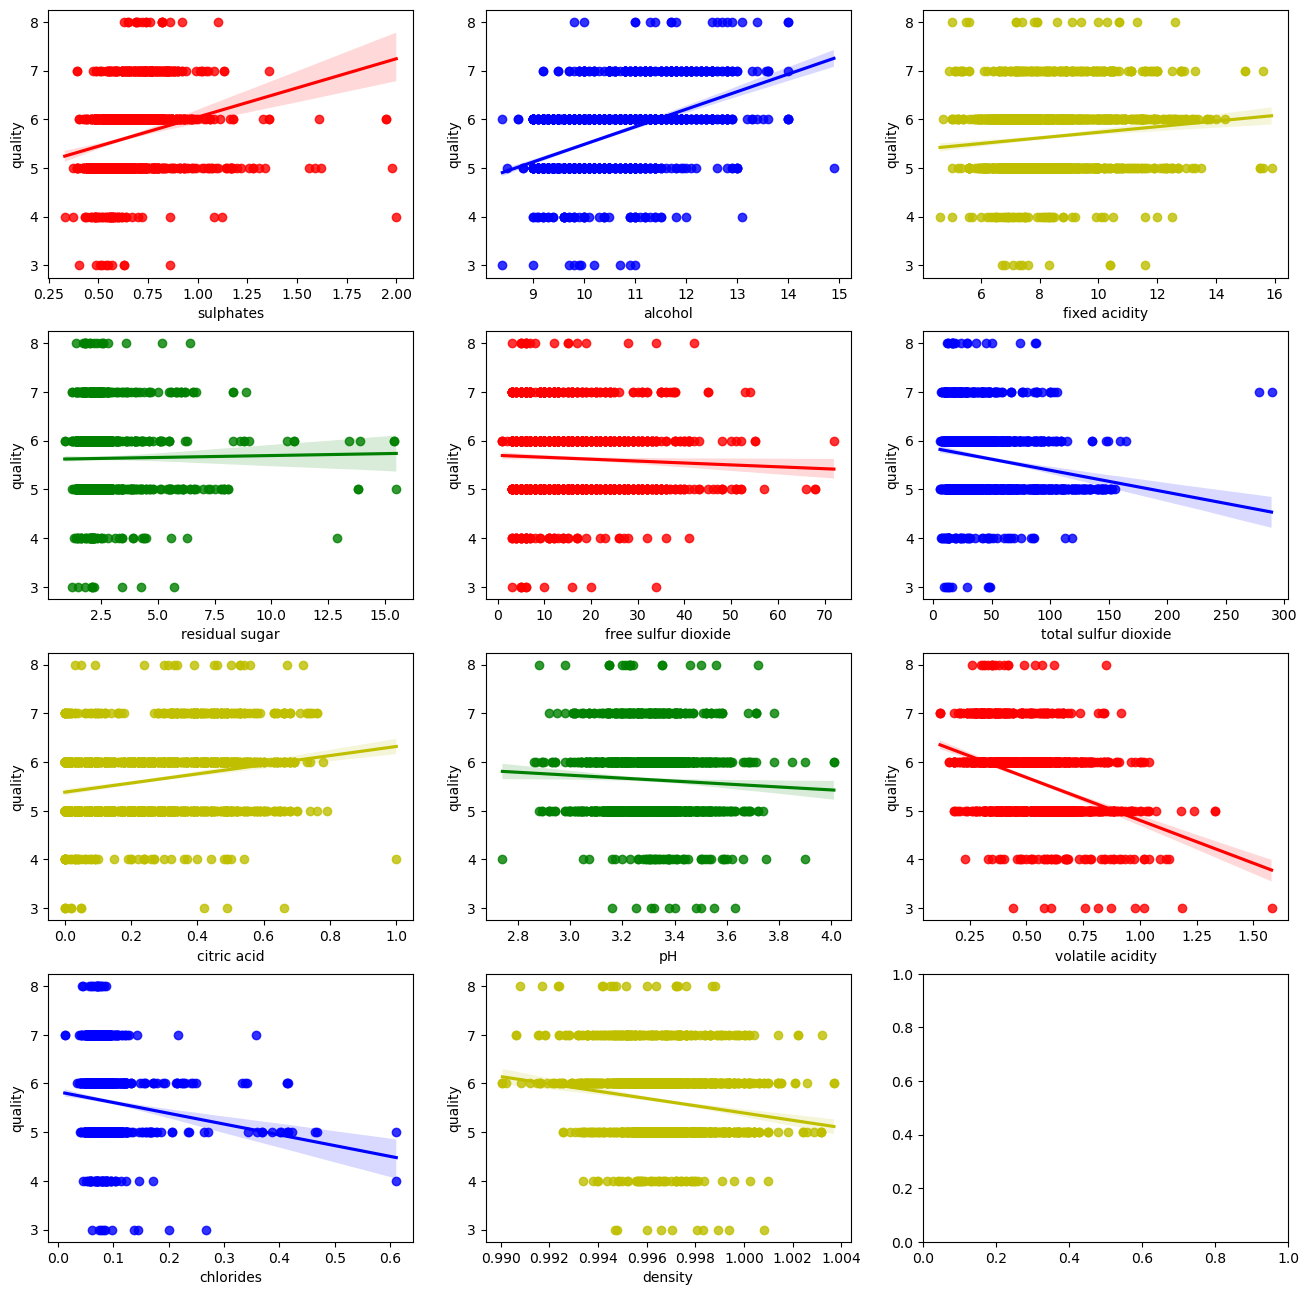

In [15]:
# 학습된 모델을 통해서, 예측값도 구하고, 실제값과 비교도하고, MSE R^2 , 평가 지표 
# 학습된 모델의 예측값, 실제값과 얼마나 일치하는 지를 조사. 
# 시각화 
import matplotlib.pyplot as plt 
import seaborn as sns 

# 이미지들을 , 2 x 3 , 표 형태로 나타내기. 
fig, axs = plt.subplots(figsize = (16,16), ncols = 3, nrows = 4)

x_features = ["sulphates","alcohol","fixed acidity","residual sugar","free sulfur dioxide","total sulfur dioxide","citric acid","pH","volatile acidity","chlorides","density"]

# 그래프의 색상 옵션 
plot_color = ["r","b", "y", "g", "r","b", "y","g", "r","b", "y"]

for i, feature in enumerate(x_features):
  # 몫 -> 2개 행으로 
  row = int(i/3)
  # 나머지 -> 0,1,2 반복
  col = i % 3
  sns.regplot(x = feature, y="quality", data = data_df, ax = axs[row][col], color = plot_color[i])